In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import glob
import numpy as np

In [3]:
path = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'
files = glob.glob(path +  '*_FittedParameters.csv')

outpath_fig = './dataFolders/Output/Figures/LinearRegression_toFindFitParameters_v2/'

In [4]:
files

['./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-10_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-1_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-2_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2\\c-3_FittedParameters.csv']

In [8]:
shape = ['c-1', 'c-2', 'c-3', 'c-10']
ctr= 0
flowername= {}
for flowertype in shape:
    file = [file for file in files if flowertype + '_' in file]
    flowername[ctr] = pd.read_csv(file[0], engine = 'python')
    ctr+=1

In [9]:
flowername[0]

,Unnamed: 0,slope,std_err,p_value,r_value,y_intercept,y_intercept_std,average_firstTrial,alpha,tau,covariance
0,one-half,-0.031294,0.082439,0.705518,-0.047771,4.084,3.155549,13.285714,9.201714,1.074173,0.131606
1,last fourth,0.050447,0.290445,0.866424,0.061293,3.204,2.689474,13.285714,10.081714,1.391862,0.137068
2,last eight,-0.312000,1.216381,0.814150,-0.146492,3.596,3.367526,13.285714,9.689714,1.237559,0.133083


In [10]:
df = []
tau_table = []
ctr = 0
length = 0
for length in range(3):
    df = pd.DataFrame({'name': ['c-1', 'c-2', 'c-3', 'c-10'],
                       'mean_y0': [flowername[0].y_intercept[length], flowername[1].y_intercept[length], 
                             flowername[2].y_intercept[length], flowername[3].y_intercept[length]],
                       'std_y0': [flowername[0].y_intercept_std[length], flowername[1].y_intercept_std[length], 
                             flowername[2].y_intercept_std[length], flowername[3].y_intercept_std[length]],
                       'tau': [flowername[0].tau[length], flowername[1].tau[length], 
                             flowername[2].tau[length], flowername[3].tau[length]],
                         'covariance':[flowername[0].covariance[length], flowername[1].covariance[length],
                                    flowername[2].covariance[length], flowername[3].covariance[length]]
                        })
    std_dev = np.sqrt(df.covariance.values)
    df['std_dev'] = std_dev
    tau_table.append(df)
    ctr+=1

In [11]:
tau_table

[   name   mean_y0    std_y0        tau   covariance    std_dev
 0   c-1  4.084000  3.155549   1.074173     0.131606   0.362776
 1   c-2  3.547455  2.808735   0.741696     0.082488   0.287207
 2   c-3  6.179600  4.287350   1.745208     0.896073   0.946611
 3  c-10  5.886190  4.933216  45.600941  1435.813073  37.892124,
    name   mean_y0    std_y0        tau   covariance    std_dev
 0   c-1  3.204000  2.689474   1.391862     0.137068   0.370227
 1   c-2  3.780667  2.995102   0.661325     0.083280   0.288583
 2   c-3  6.281818  4.231659   1.662645     0.902831   0.950174
 3  c-10  7.496000  5.307050  24.335878  1031.374125  32.115014,
    name    mean_y0    std_y0       tau  covariance   std_dev
 0   c-1   3.596000  3.367526  1.237559    0.133083  0.364805
 1   c-2   3.764286  1.784730  0.666671    0.083155  0.288365
 2   c-3   7.503333  5.257850  0.983632    1.280442  1.131566
 3  c-10  10.710000  3.082986  0.040700         inf       inf]

In [12]:
import pickle

with open('./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/AllFitVariables', 'wb') as fp:
    pickle.dump(tau_table, fp)

In [13]:
tau_table[0]

,name,mean_y0,std_y0,tau,covariance,std_dev
0,c-1,4.084000,3.155549,1.074173,0.131606,0.362776
1,c-2,3.547455,2.808735,0.741696,0.082488,0.287207
2,c-3,6.179600,4.287350,1.745208,0.896073,0.946611
3,c-10,5.886190,4.933216,45.600941,1435.813073,37.892124


In [15]:
# parameters used

# which fitted parameters to pick from parameters df, those calculated from 1/2 (=0),1/4 (=1) or 1/8th (=2) of data 

idx = 1 # (because 1/4 length data slope is = 0 across all shapes)

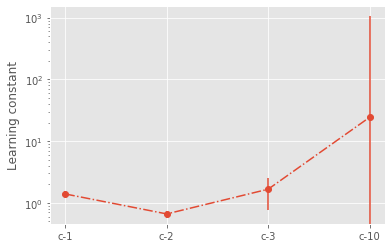

In [16]:
plt.errorbar(tau_table[idx].name, tau_table[idx].tau, yerr = tau_table[idx].covariance, fmt = 'o-.')
plt.yscale('log')
plt.ylabel('Learning constant')
ymin, ymax = plt.ylim()
plt.savefig(outpath_fig + 'tauWithSE.svg')

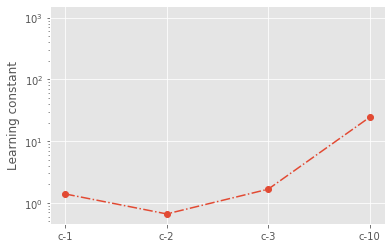

In [17]:
plt.plot(tau_table[idx].name, tau_table[idx].tau, 'o-.')
plt.yscale('log')
plt.ylabel('Learning constant')
plt.ylim(ymin, ymax)
plt.savefig(outpath_fig + 'tau.svg')

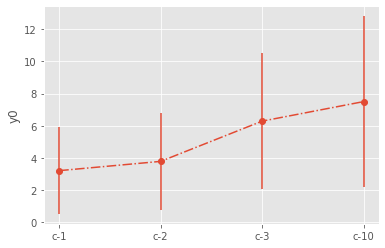

In [18]:
plt.errorbar(tau_table[idx].name, tau_table[idx].mean_y0, yerr = tau_table[idx].std_y0, fmt = 'o-.')
plt.ylabel('y0')
plt.savefig(outpath_fig + 'y_intercept.svg')